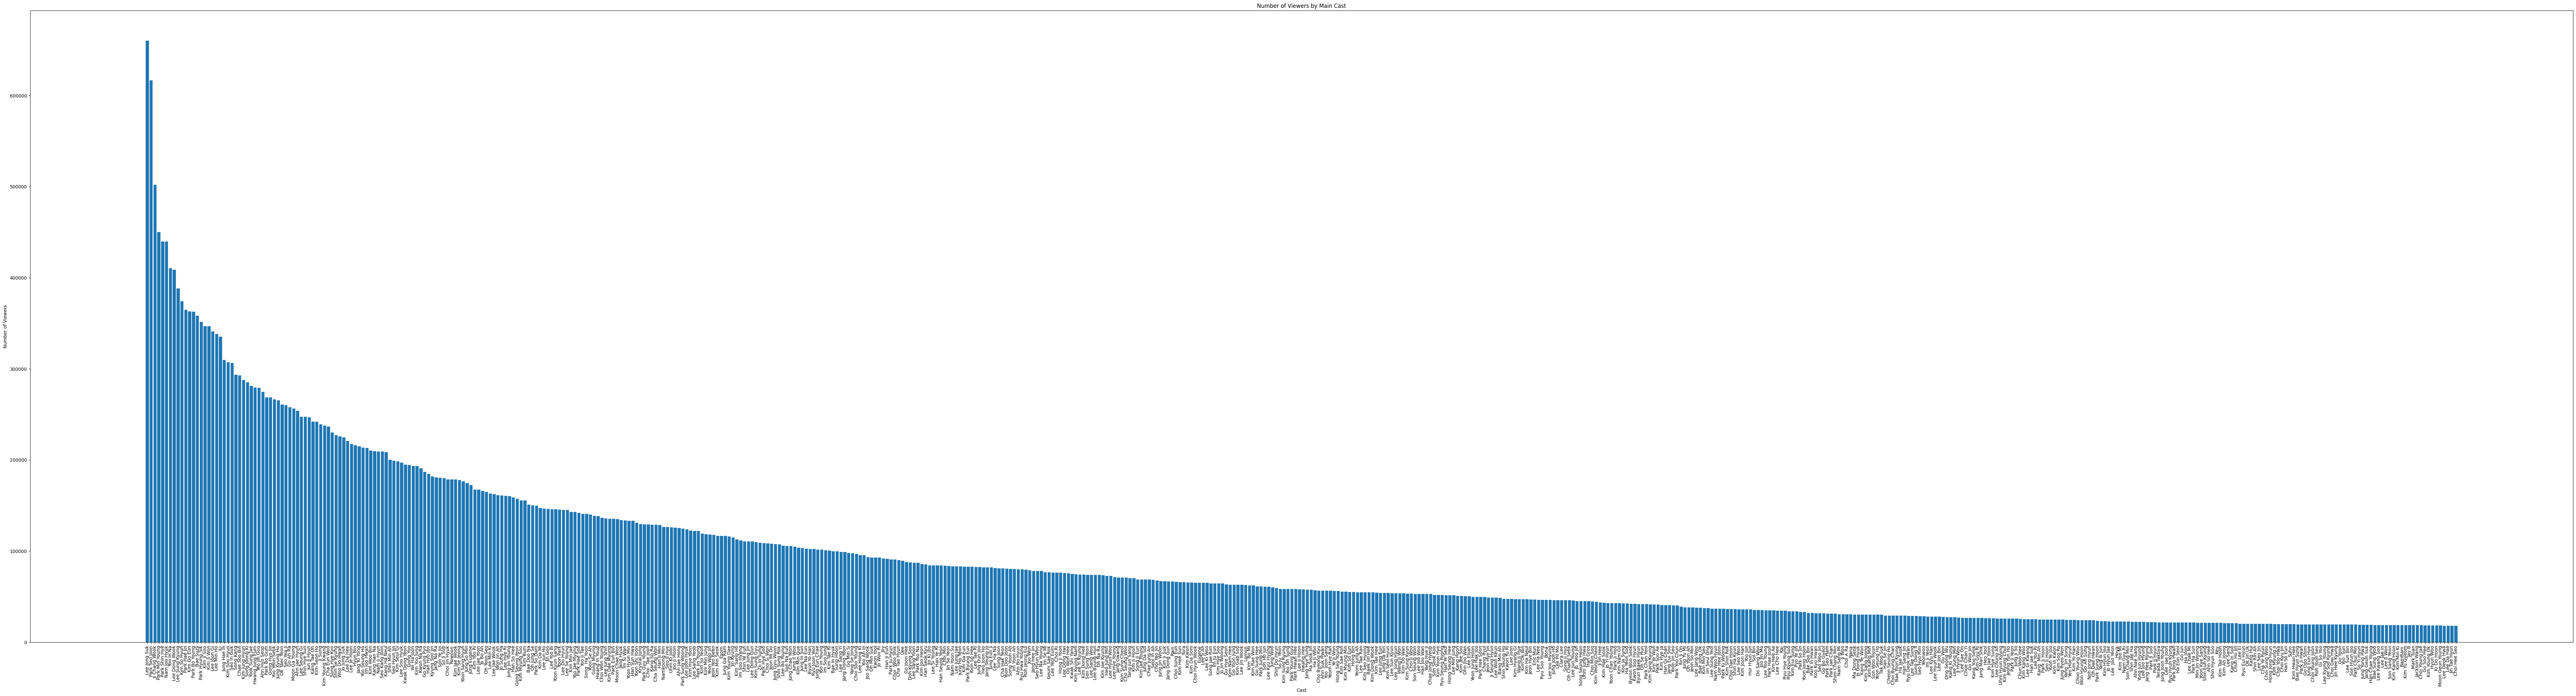

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Top_500_popular_drama_details_from_mydramalist.csv')

# Filter the data to only include recent South Korean dramas
is_kdrama = df['country'] == 'South Korea'
is_recent = df['year'] >= 2013
proc_df = df[is_kdrama & is_recent]

# Split the main role column into individual cast members
cast = proc_df['main_role'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
cast.name = 'Cast'

# Join the individual cast members back to the original DataFrame
proc_df = proc_df.join(cast)

# Group the data by cast and sum the number of viewers
cast_viewers = proc_df.groupby('Cast')['no_of_viewers'].sum().reset_index()

# Sort the data by number of viewers in descending order
cast_viewers = cast_viewers.sort_values('no_of_viewers', ascending=False)

# Create a bar plot of the data
plt.figure(figsize=(100, 25))  # adjust the figure size as needed
plt.bar(cast_viewers['Cast'], cast_viewers['no_of_viewers'])
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.ylabel('Number of Viewers')
plt.title('Number of Viewers by Main Cast')
plt.show()

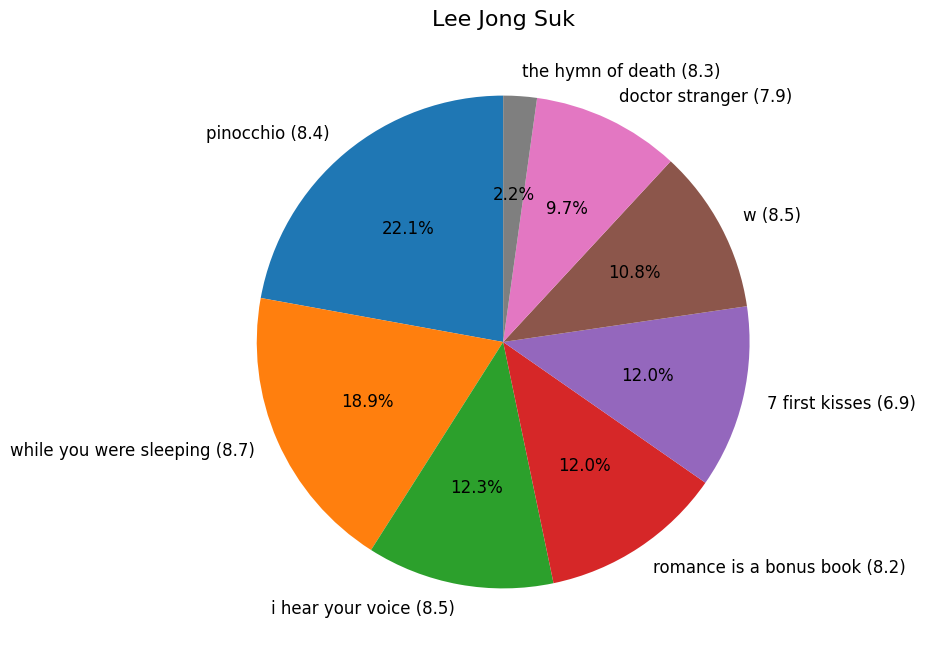

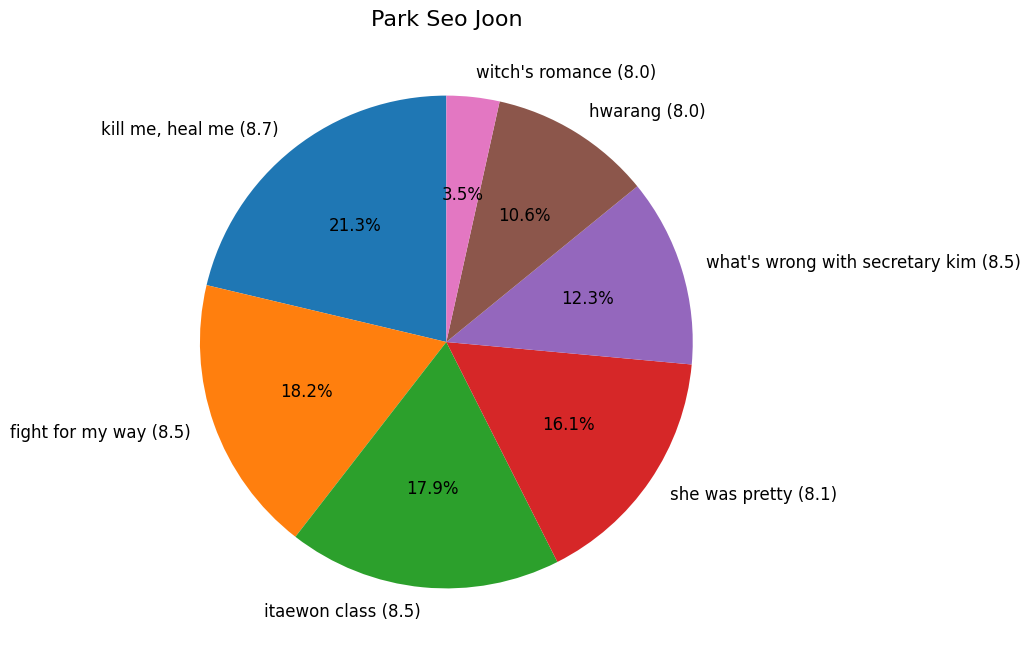

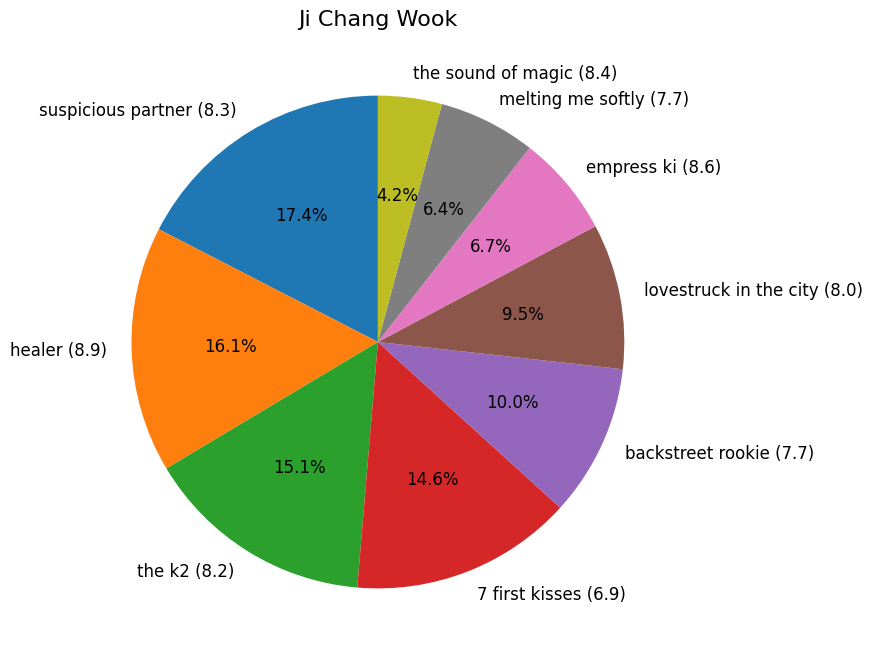

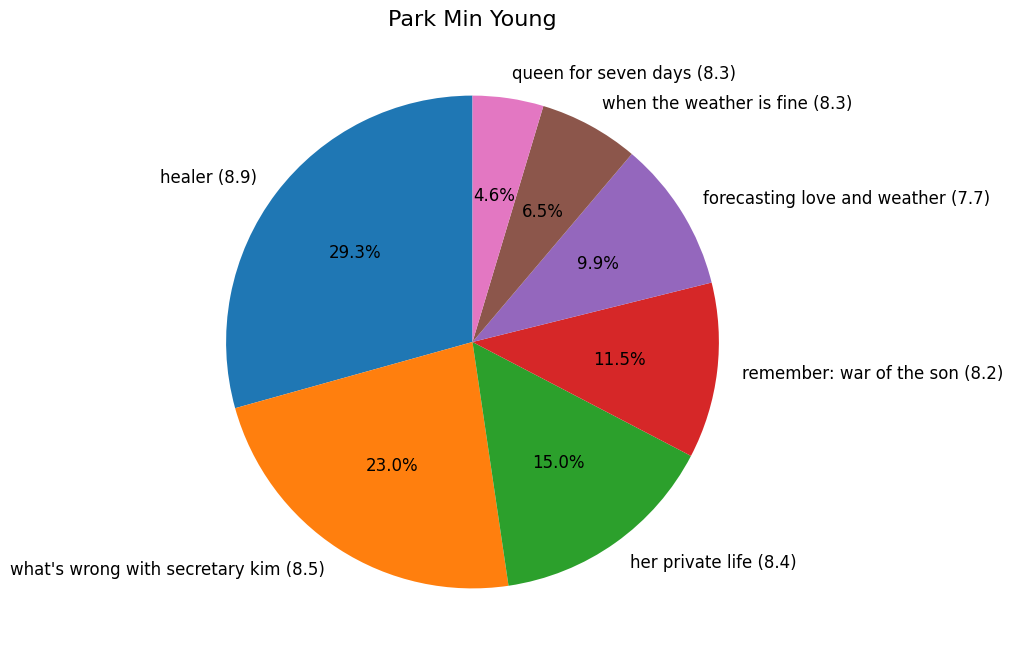

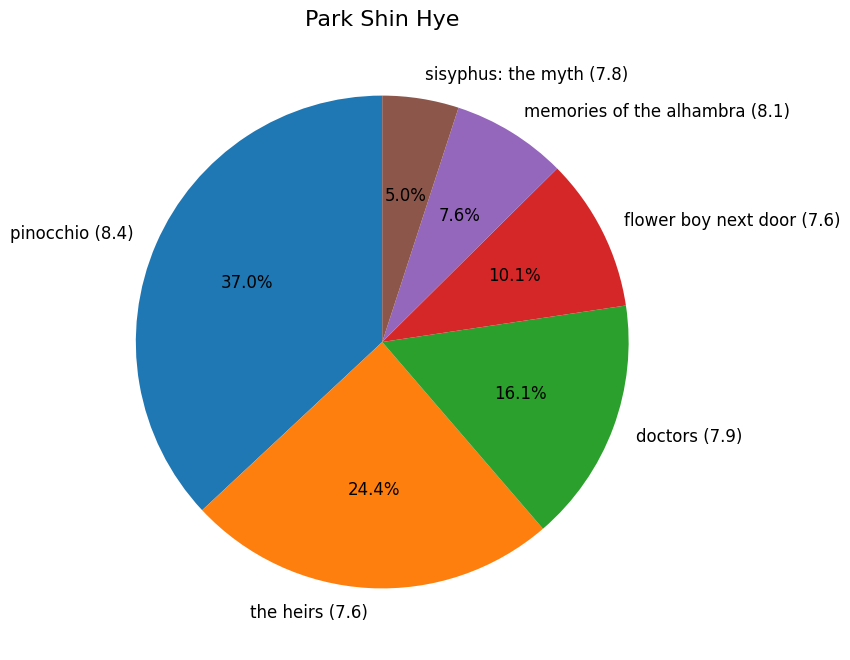

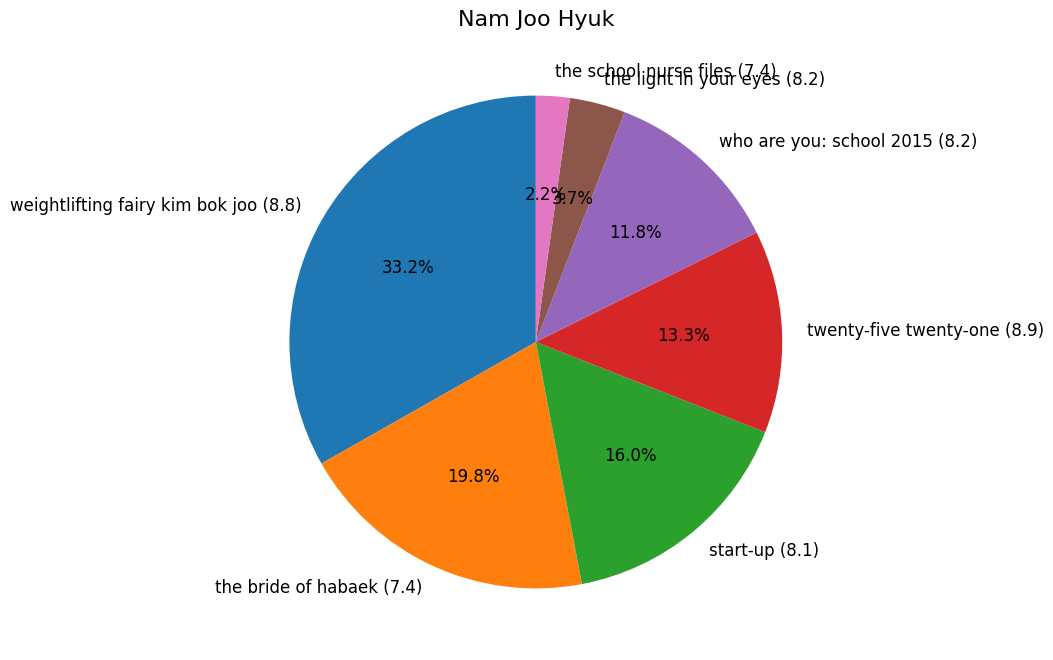

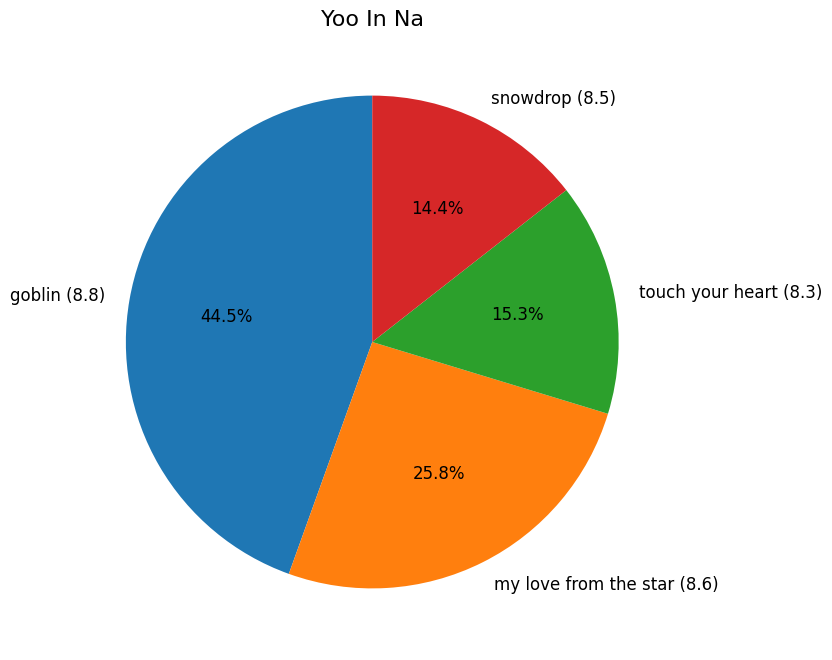

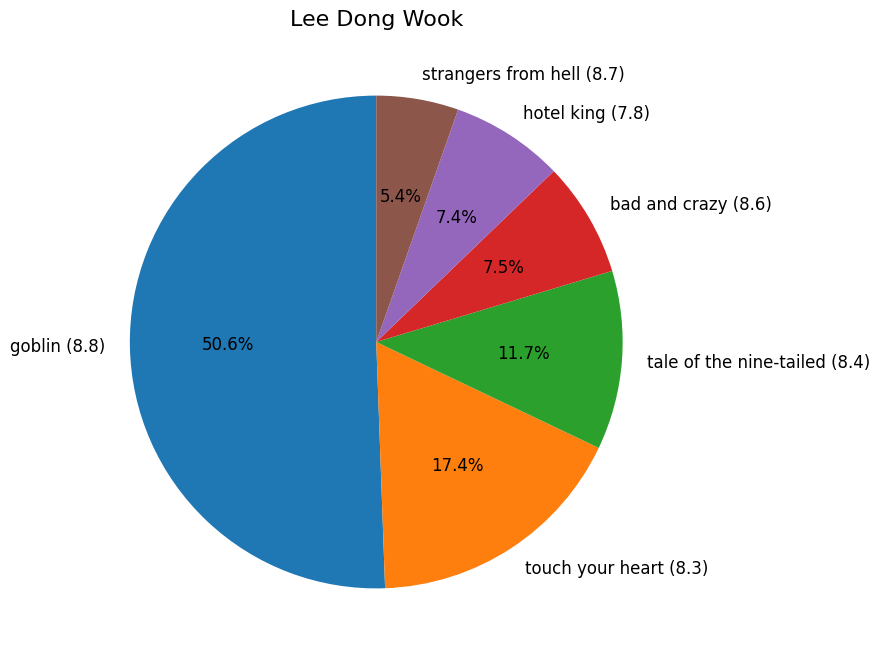

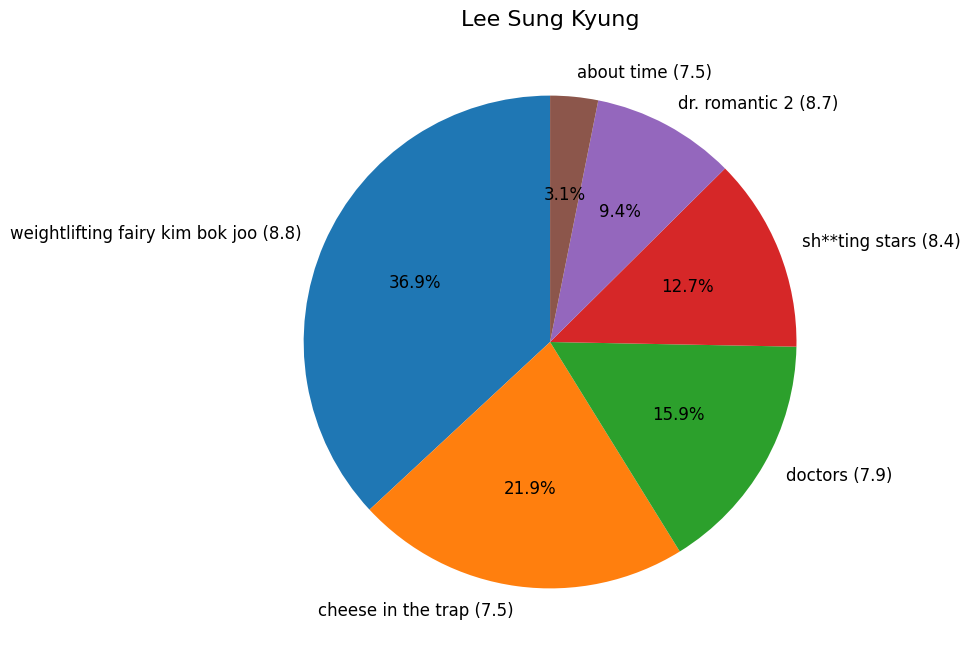

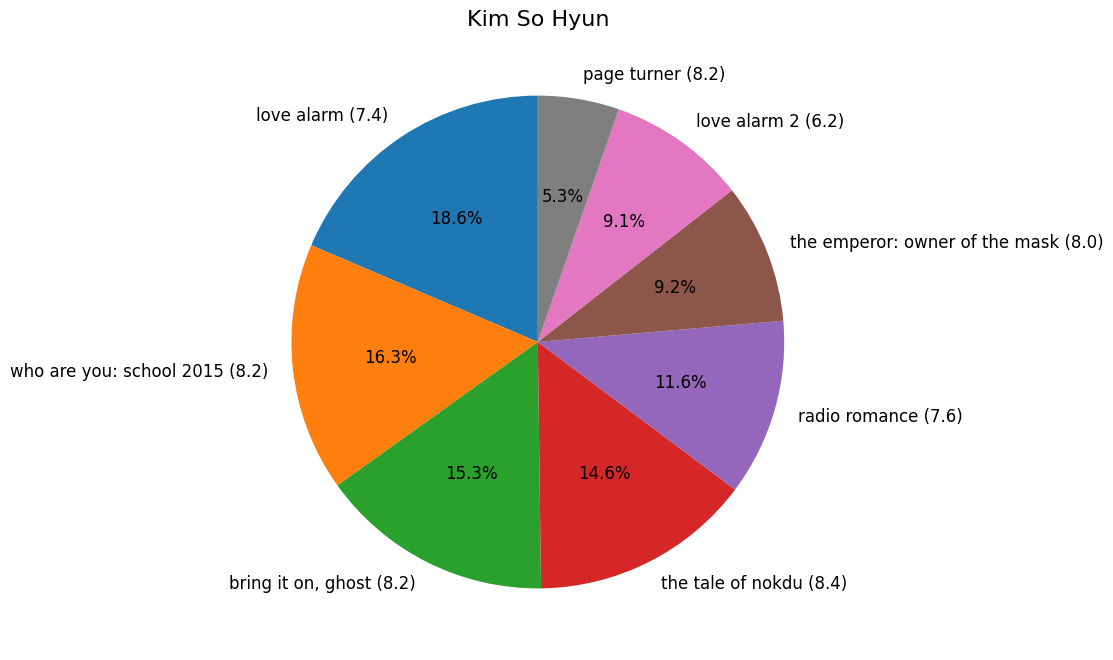

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Top_500_popular_drama_details_from_mydramalist.csv')

# Filter the data to only include recent South Korean dramas
is_kdrama = df['country'] == 'South Korea'
is_recent = df['year'] >= 2013
proc_df = df[is_kdrama & is_recent]

# Split the main role column into individual cast members
cast = proc_df['main_role'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
cast.name = 'Cast'

# Join the individual cast members back to the original DataFrame
proc_df = proc_df.join(cast)

# Group the data by cast and sum the number of viewers
cast_viewers = proc_df.groupby('Cast')['no_of_viewers'].sum().reset_index()

# Sort the data by number of viewers in descending order
cast_viewers = cast_viewers.sort_values('no_of_viewers', ascending=False)

# Get the top 10 cast members
top_cast = cast_viewers.head(10)['Cast']

# Loop through the top 10 cast members and create a pie chart for each one
for c in top_cast:
    # Filter the data to only include dramas that the current cast member has appeared in
    is_in_drama = proc_df['main_role'].str.contains(c)
    drama_df = proc_df[is_in_drama]
    
    # Group the data by drama and sum the number of viewers for each one
    drama_viewers = drama_df.groupby(['name', 'rating'])['no_of_viewers'].sum().reset_index()
    
    # Sort the data by number of viewers in descending order
    drama_viewers = drama_viewers.sort_values('no_of_viewers', ascending=False)
    
    # Create a pie chart for the current cast member
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(drama_viewers['no_of_viewers'], labels=drama_viewers.apply(lambda x: f"{x['name']} ({x['rating']})", axis=1), startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
    ax.set_title(f"{c}", fontsize=16)
    plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Top_500_popular_drama_details_from_mydramalist.csv')
df.head()


,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,424,172175,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",390,5962,grim reaper - (sunny; bromance; shin; relation...,2797,"age gap - (lead), grim reaper, female lead, ye...",1061,"Counter({'': 226, 'usa': 13, 'united states': ...","Counter({'female': 299, '': 52, 'male': 38})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",310,159377,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",289,4215,"female lead - (character), male lead - (second...",1905,"serial killer - (plot), female lead, watch dra...",1012,"Counter({'': 178, 'united states': 8, 'usa': 6...","Counter({'female': 207, '': 53, 'male': 29})"
2,2,descendants of the sun,A love story that develops between a surgeon a...,254,146066,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Female Lead, Multiple Couples, Bro...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",239,3521,"watch drama - (start; want), second lead - (co...",1553,"watch drama - (time), female lead, think drama...",710,"Counter({'': 137, 'india': 8, 'usa': 6, 'phili...","Counter({'female': 187, '': 30, 'male': 22})"
3,3,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,246,144935,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",233,3550,"love story - (character), really good, fall lo...",1869,"watch drama, eat disorder, character really, s...",630,"Counter({'': 126, 'usa': 9, 'united states': 4...","Counter({'female': 170, '': 39, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",266,139758,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",247,4316,"watch drama, love story, best drama - (watch),...",1637,"second half, watch drama - (never), plot hole,...",1008,"Counter({'': 139, 'usa': 5, 'philippines': 5, ...","Counter({'female': 182, '': 44, 'male': 21})"


In [8]:
# Filter the data to only include recent South Korean dramas
is_kdrama = df['country'] == 'South Korea'
is_recent = df['year'] >= 2013
proc_df = df[is_kdrama & is_recent]
proc_df.describe()

,Unnamed: 0,no_of_reviews,no_of_viewers,episodes,year,rating,no_of_rating,rank,popularity,no_of_extracted_reviews,Total_sentences,POSITIVE_sentences,NEGATIVE_sentences
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,234.096573,102.277259,43873.660436,17.619938,2017.825545,8.214330,20853.778816,1315.112150,235.077882,95.109034,1571.214953,649.959502,359.261682
std,146.071536,77.665998,28000.501815,7.657030,2.516341,0.478585,15627.548824,1434.660306,155.714453,72.020032,1260.436058,540.658269,309.412861
min,0.000000,13.000000,17964.000000,2.000000,2013.000000,6.200000,5377.000000,4.000000,1.000000,5.000000,171.000000,60.000000,20.000000
25%,102.000000,49.000000,23674.000000,16.000000,2016.000000,7.900000,10050.000000,274.000000,99.000000,47.000000,741.000000,297.000000,160.000000
50%,232.000000,77.000000,34550.000000,16.000000,2018.000000,8.300000,15225.000000,763.000000,215.000000,70.000000,1124.000000,474.000000,259.000000
75%,368.000000,131.000000,53813.000000,20.000000,2020.000000,8.500000,26467.000000,1917.000000,365.000000,121.000000,1941.000000,823.000000,469.000000
max,496.000000,510.000000,172175.000000,52.000000,2022.000000,9.200000,91542.000000,6292.000000,538.000000,465.000000,8117.000000,3982.000000,2153.000000


In [14]:
# Split the main role column into individual cast members
cast = proc_df['main_role'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
cast.name = 'Cast'

# Join the individual cast members back to the original DataFrame
proc_df = proc_df.join(cast)


In [34]:
# Group the data by cast and sum the number of viewers
cast_viewers = proc_df.groupby('Cast')['no_of_viewers'].sum().reset_index()

# Sort the data by number of viewers in descending order
cast_viewers = cast_viewers.sort_values('no_of_viewers', ascending=False)

# Get the top k cast members
k = 5
top_cast = cast_viewers.head(k)['Cast']

In [35]:
# ! Group the data by cast and average rating
cast_ratings = proc_df.groupby('Cast')['rating'].mean().reset_index()
cast_ratings


,Cast,rating
0,Ahn Bo Hyun,8.600000
1,Ahn Hyo Seop,8.316667
2,Ahn Jae Hong,8.500000
3,Ahn Jae Hyun,7.920000
4,Ahn Nae Sang,7.300000
...,...,...
595,Yoon So Hee,7.900000
596,Yoon Ye Joo,7.600000
597,Yun Ji On,8.900000
598,Yura,7.650000


In [36]:
cast_ratings = cast_ratings.sort_values('rating', ascending=False)
top_10_cast_ratings = cast_ratings.head(k)
top_10_cast_ratings

,Cast,rating
119,Hong Seung Hee,9.2
143,Jang Hee Jin,9.1
339,Lee Dong Hwi,9.1
497,Seo Hyun Woo,9.1
152,Jeon Mi Do,9.1


In [37]:
cast_ratings = cast_ratings.sort_values('rating', ascending=False)
top_k_cast_by_views_ratings = cast_ratings[cast_ratings['Cast'].isin(top_cast)]
top_k_cast_by_views_ratings

,Cast,rating
469,Park Min Young,8.328571
471,Park Seo Joon,8.328571
361,Lee Jong Suk,8.175000
156,Ji Chang Wook,8.077778
472,Park Shin Hye,7.900000


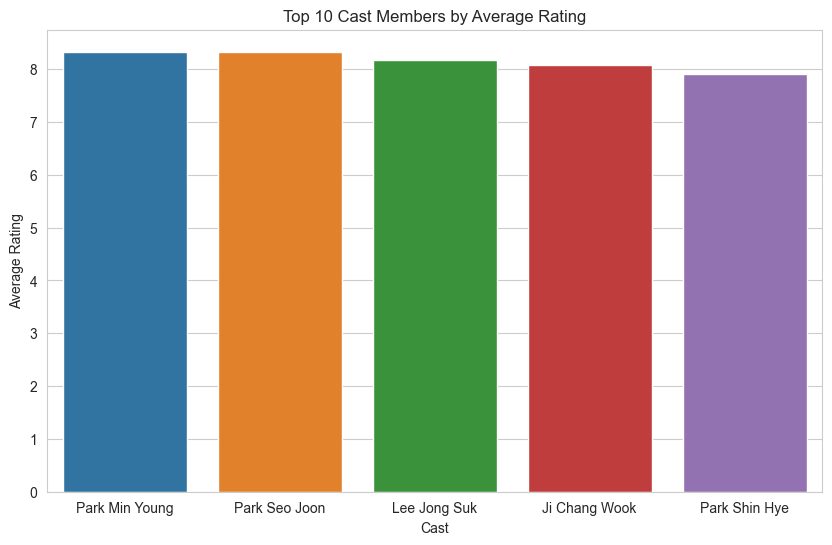

In [40]:
import seaborn as sns

# Plot top 10 cast members by average rating using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Cast', y='rating', data=top_k_cast_by_views_ratings)
# plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.ylabel('Average Rating')
plt.title('Top 10 Cast Members by Average Rating')
plt.savefig('images/Top_10_Cast_Members_by_Average_Rating.png')
plt.show()

### Misc

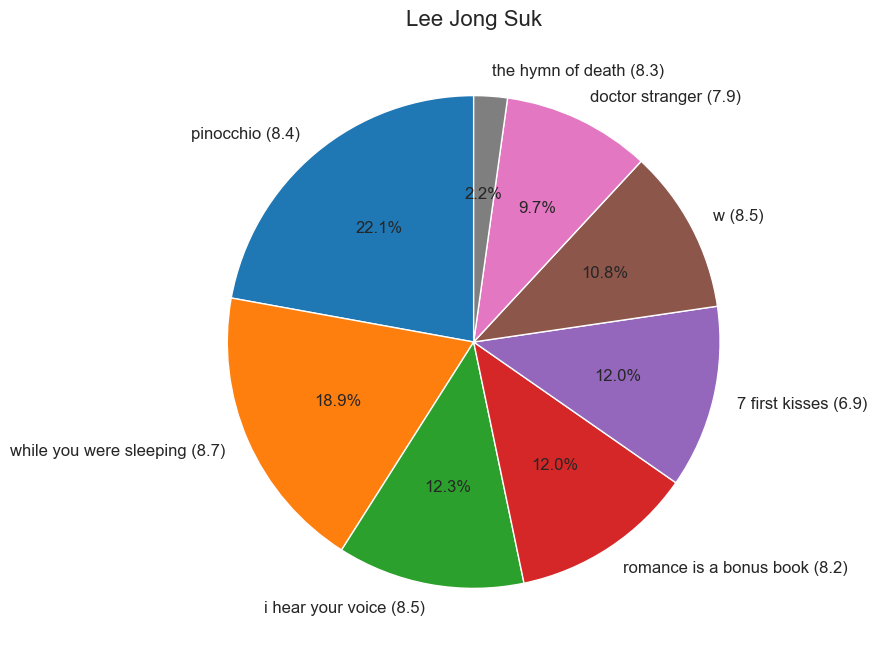

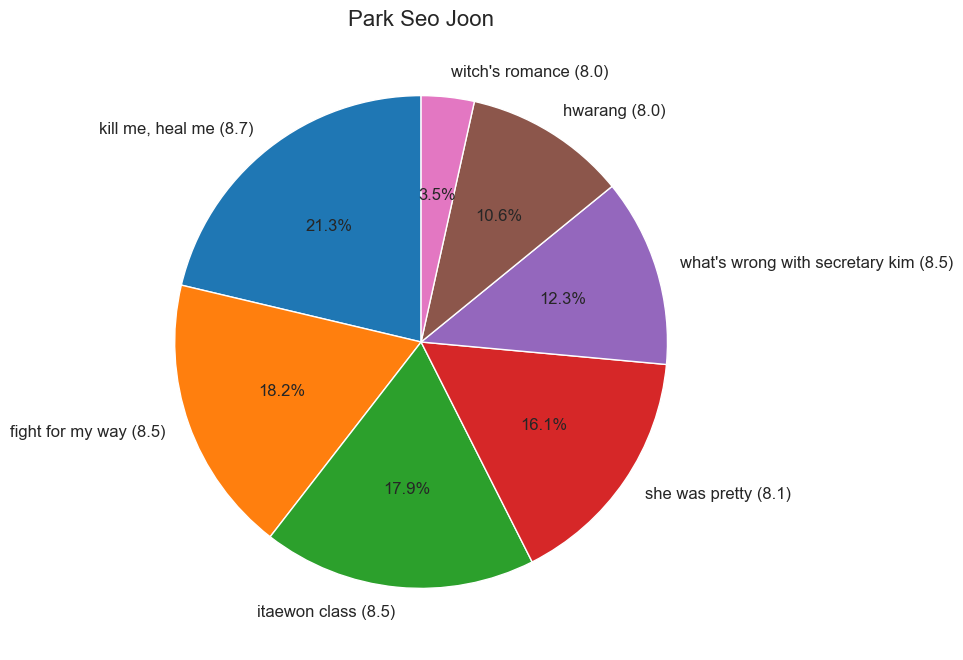

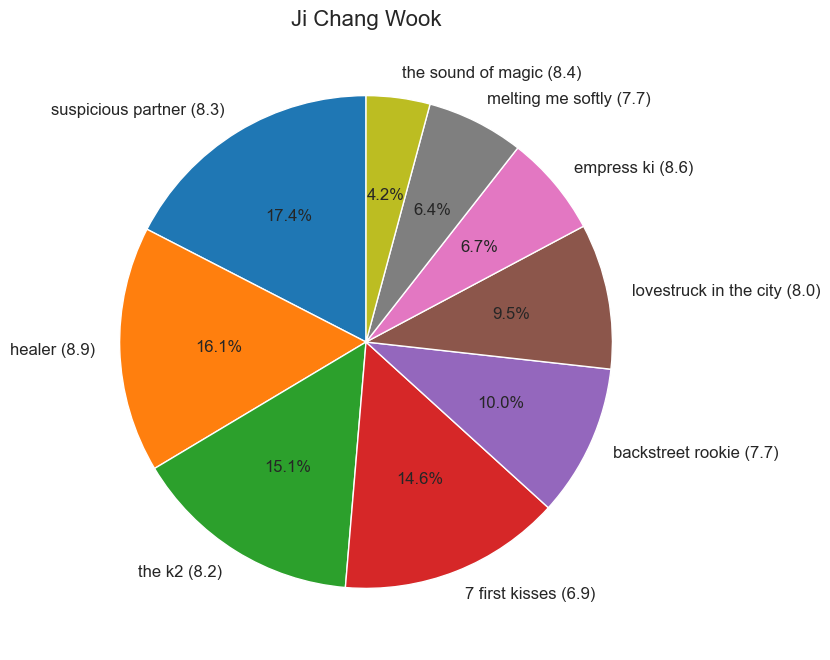

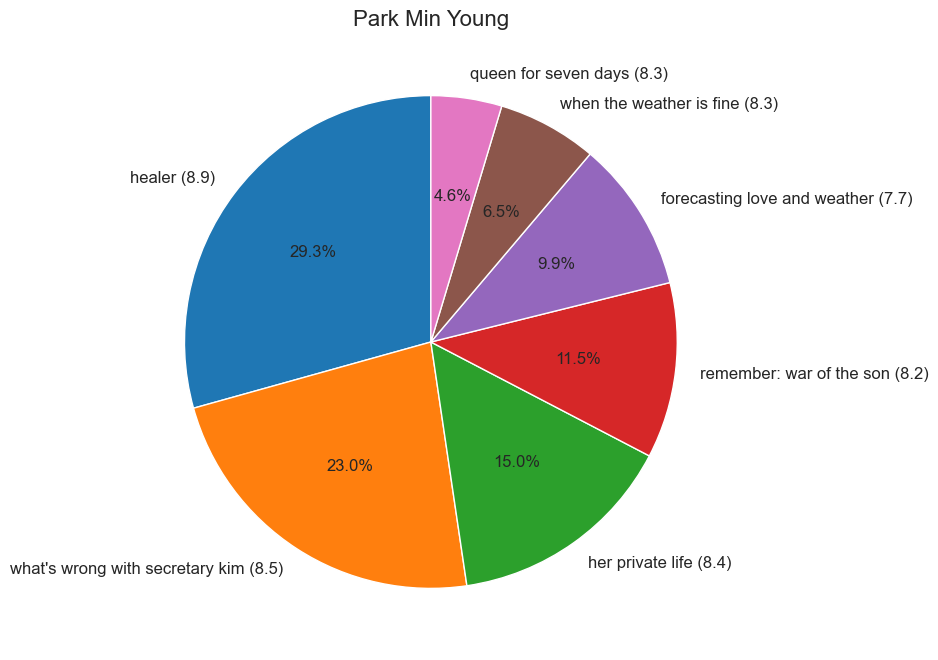

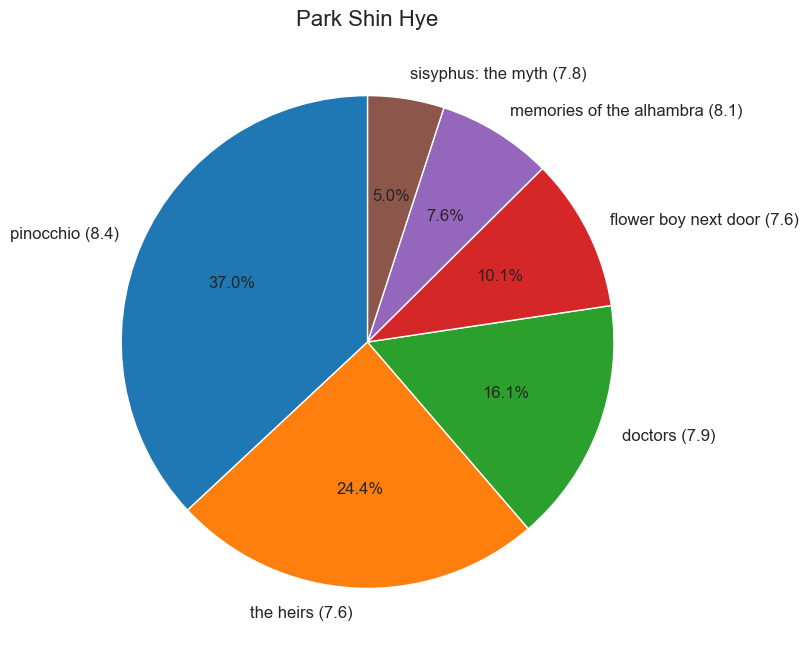

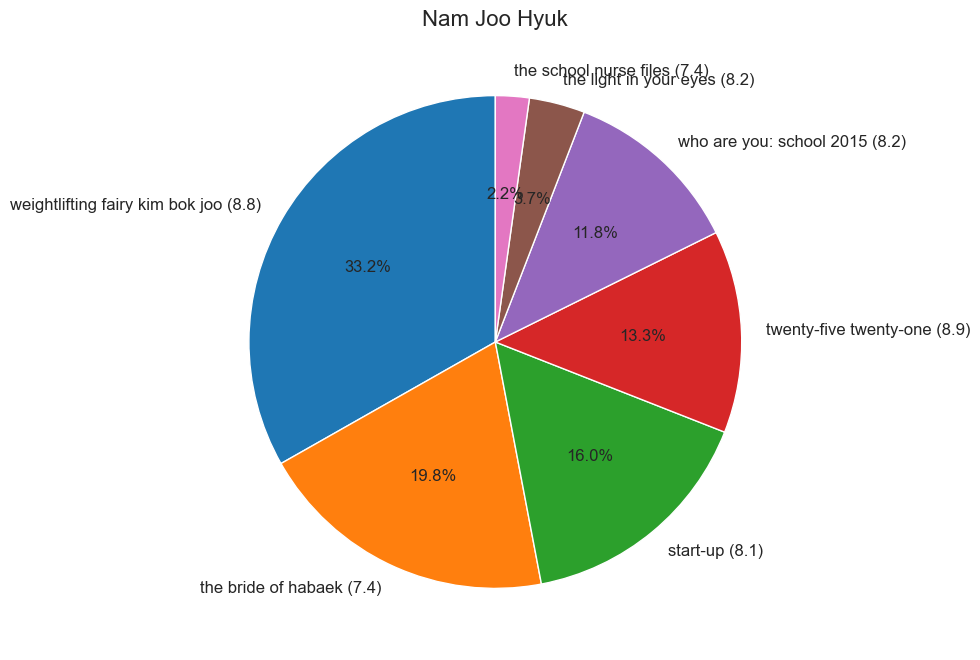

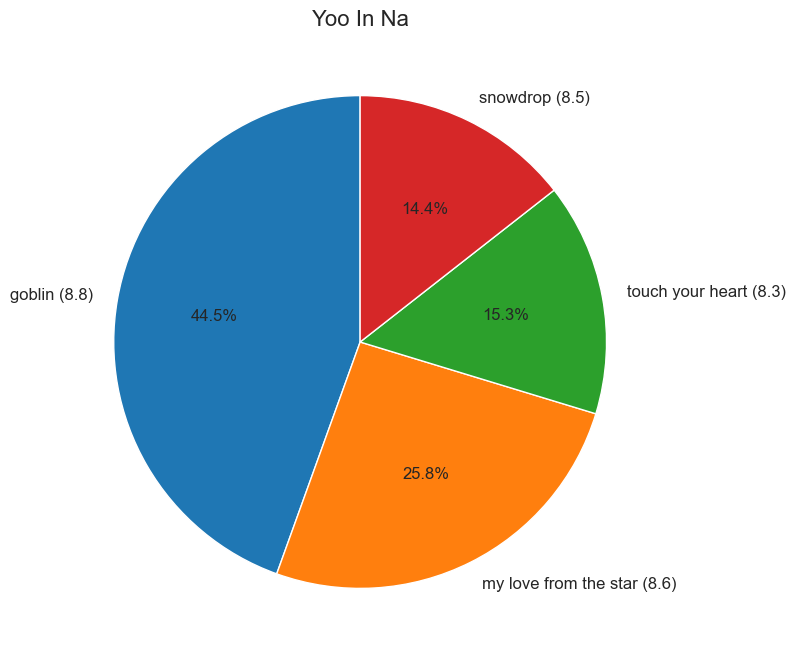

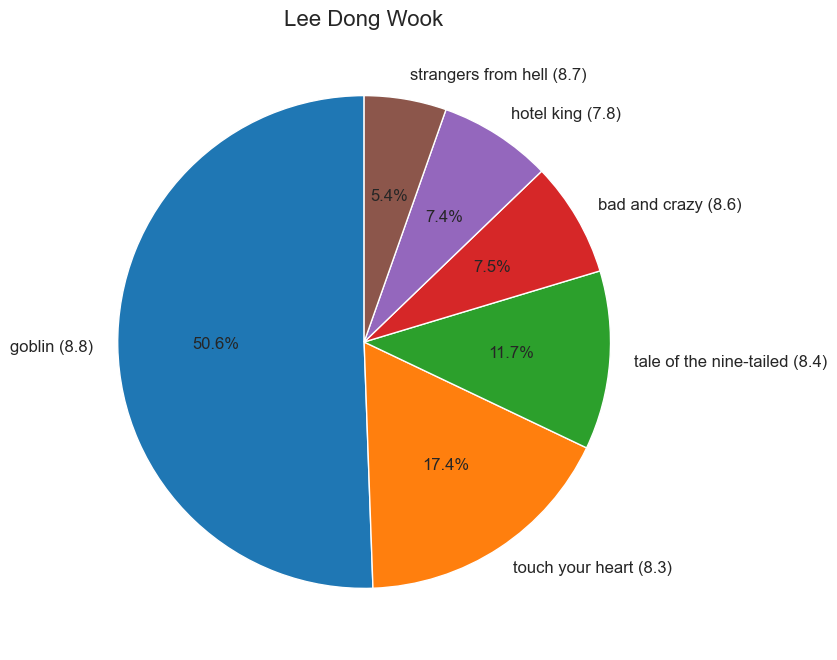

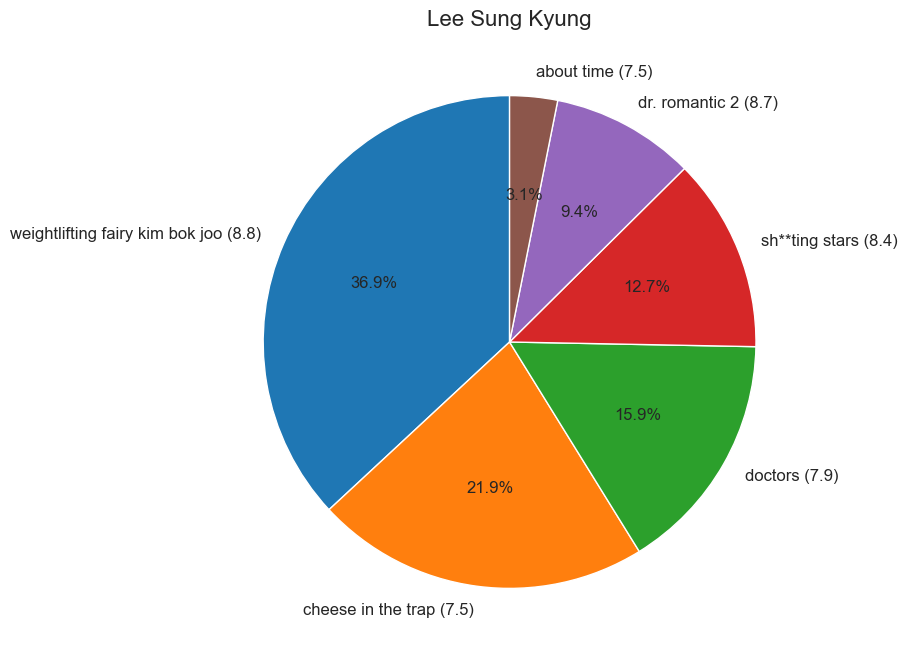

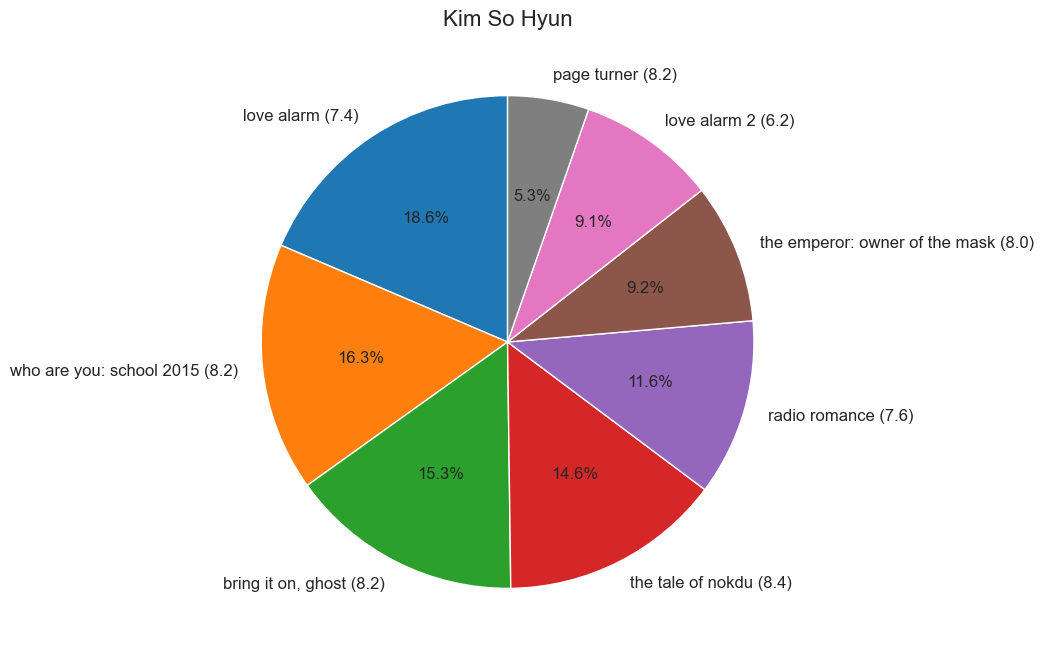

In [29]:
for c in top_cast:
    # Filter the data to only include dramas that the current cast member has appeared in
    is_in_drama = proc_df['main_role'].str.contains(c)
    drama_df = proc_df[is_in_drama]
    
    # Group the data by drama and sum the number of viewers for each one
    drama_viewers = drama_df.groupby(['name', 'rating'])['no_of_viewers'].sum().reset_index()
    
    # Sort the data by number of viewers in descending order
    drama_viewers = drama_viewers.sort_values('no_of_viewers', ascending=False)
    
    # Create a pie chart for the current cast member
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(drama_viewers['no_of_viewers'], labels=drama_viewers.apply(lambda x: f"{x['name']} ({x['rating']})", axis=1), startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
    ax.set_title(f"{c}", fontsize=16)
    plt.show()

In [30]:
# Plot a graph of average rating against cast
def plot_avg_rating_against_cast_member(cast_member):
    # Filter the data to only include dramas that the current cast member has appeared in
    is_in_drama = proc_df['main_role'].str.contains(cast_member)
    drama_df = proc_df[is_in_drama]
    
    # Group the data by drama and sum the number of viewers for each one
    drama_viewers = drama_df.groupby(['name', 'rating'])['no_of_viewers'].sum().reset_index()
    
    # Sort the data by number of viewers in descending order
    drama_viewers = drama_viewers.sort_values('no_of_viewers', ascending=False)
    display(drama_viewers)


for c in top_cast:
    plot_avg_rating_against_cast_member(c)


,name,rating,no_of_viewers
3,pinocchio,8.4,573855
7,while you were sleeping,8.7,488628
2,i hear your voice,8.5,318356
4,romance is a bonus book,8.2,312216
0,7 first kisses,6.9,310950
6,w,8.5,279516
1,doctor stranger,7.9,251276
5,the hymn of death,8.3,57008


,name,rating,no_of_viewers
3,"kill me, heal me",8.7,465505
0,fight for my way,8.5,398256
2,itaewon class,8.5,392080
4,she was pretty,8.1,352044
5,what's wrong with secretary kim,8.5,269794
1,hwarang,8.0,232665
6,witch's romance,8.0,75909


,name,rating,no_of_viewers
6,suspicious partner,8.3,371480
3,healer,8.9,343950
7,the k2,8.2,321396
0,7 first kisses,6.9,310950
1,backstreet rookie,7.7,212622
4,lovestruck in the city,8.0,203412
2,empress ki,8.6,141744
5,melting me softly,7.7,135882
8,the sound of magic,8.4,89139


,name,rating,no_of_viewers
1,healer,8.9,343950
5,what's wrong with secretary kim,8.5,269794
2,her private life,8.4,176074
4,remember: war of the son,8.2,135195
0,forecasting love and weather,7.7,116492
6,when the weather is fine,8.3,76728
3,queen for seven days,8.3,54462


,name,rating,no_of_viewers
3,pinocchio,8.4,573855
5,the heirs,7.6,378129
0,doctors,7.9,249316
1,flower boy next door,7.6,156363
2,memories of the alhambra,8.1,117250
4,sisyphus: the myth,7.8,77808


,name,rating,no_of_viewers
5,weightlifting fairy kim bok joo,8.8,579740
1,the bride of habaek,7.4,345400
0,start-up,8.1,280060
4,twenty-five twenty-one,8.9,231915
6,who are you: school 2015,8.2,206118
2,the light in your eyes,8.2,63810
3,the school nurse files,7.4,38634


,name,rating,no_of_viewers
0,goblin,8.8,860875
1,my love from the star,8.6,498916
3,touch your heart,8.3,295496
2,snowdrop,8.5,279118


,name,rating,no_of_viewers
1,goblin,8.8,860875
5,touch your heart,8.3,295496
4,tale of the nine-tailed,8.4,199665
0,bad and crazy,8.6,128260
2,hotel king,7.8,126224
3,strangers from hell,8.7,91760


,name,rating,no_of_viewers
5,weightlifting fairy kim bok joo,8.8,579740
1,cheese in the trap,7.5,344144
2,doctors,7.9,249316
4,sh**ting stars,8.4,200034
3,dr. romantic 2,8.7,148128
0,about time,7.5,49226


,name,rating,no_of_viewers
1,love alarm,7.4,234780
7,who are you: school 2015,8.2,206118
0,"bring it on, ghost",8.2,193593
6,the tale of nokdu,8.4,184096
4,radio romance,7.6,146604
5,the emperor: owner of the mask,8.0,116040
2,love alarm 2,6.2,115041
3,page turner,8.2,67446
